In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
cnx = sqlite3.connect('../soccer/database.sqlite')
data = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [7]:
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
data.shape

(183978, 42)

In [9]:
features = [
    'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve',
    'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
    'sprint_speed', 'agility', 'reactions', 'balance', 
    'shot_power', 'jumping', 'stamina', 'strength', 
    'long_shots', 'aggression', 'interceptions', 'positioning',
    'vision', 'penalties', 'marking', 'standing_tackle',
    'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
    'gk_positioning', 'gk_reflexes'
]

In [10]:
target = ['overall_rating']

In [11]:
data = data.dropna()

In [12]:
X = data[features]

In [13]:
Y = data[target]

In [14]:
X

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,75.0,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [15]:
Y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
5,74.0
6,74.0
7,73.0
8,73.0
9,73.0


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


120837


In [19]:
Y_prediction = regressor.predict(X_test)
Y_prediction

array([[66.51284879],
       [79.77234615],
       [66.57371825],
       ...,
       [69.23780133],
       [64.58351696],
       [73.6881185 ]])

In [79]:
Y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


In [80]:
RMSE = sqrt(mean_squared_error(Y_test, Y_prediction))

In [82]:
print(RMSE)

2.8053030468552365


In [69]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [70]:
Y_prediction = regressor.predict(X_test)
Y_prediction

array([63.        , 84.        , 62.38666667, ..., 69.        ,
       62.        , 72.        ])

In [72]:
RMSE = sqrt(mean_squared_error(Y_test, Y_prediction))

In [73]:
print(RMSE)

1.4518290141570904


In [75]:
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_1.fit(X_train, Y_train)
regr_2 = DecisionTreeRegressor(max_depth=100)
regr_2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [76]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

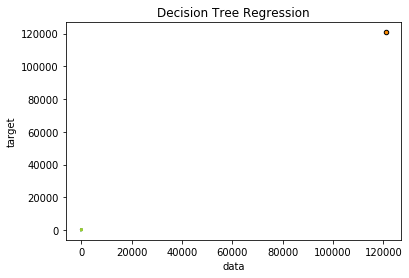

In [78]:
plt.figure()
plt.scatter(len(X_train), len(Y_train), s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=20", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()